In [31]:
import librosa
import IPython.display as ipd
audio_path = 'release_in_the_wild/2.wav'
music_array, sample_rate = librosa.load(path)
print(type(sample_rate))


<class 'int'>


In [32]:

music_array, sample_rate = librosa.load(audio_path)

In [34]:
print(music_array.shape, sample_rate)


(178563,) 22050


In [35]:
music_array2 , sample_rate2 = librosa.load(audio_path, sr=44100)


In [36]:
print(music_array2.shape, sample_rate2)


(357125,) 44100


In [37]:
music_array3 , sample_rate_none = librosa.load(audio_path, sr=None)


In [38]:
print(music_array3.shape, sample_rate_none)


(129569,) 16000


In [63]:
import IPython.display as ipd
ipd.Audio(audio_path,rate=sample_rate)

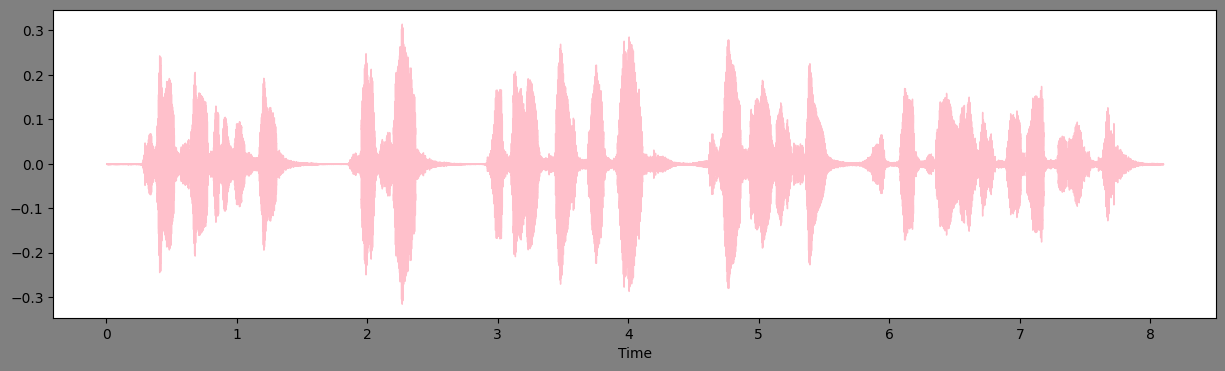

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
audio_path = 'release_in_the_wild/2.wav'
music_array2 , sample_rate2 = librosa.load(audio_path, sr=44100)
plt.figure(figsize=(15, 4), facecolor=(.5, .5, .5))
librosa.display.waveshow(music_array2, sr=sample_rate2, color='pink')

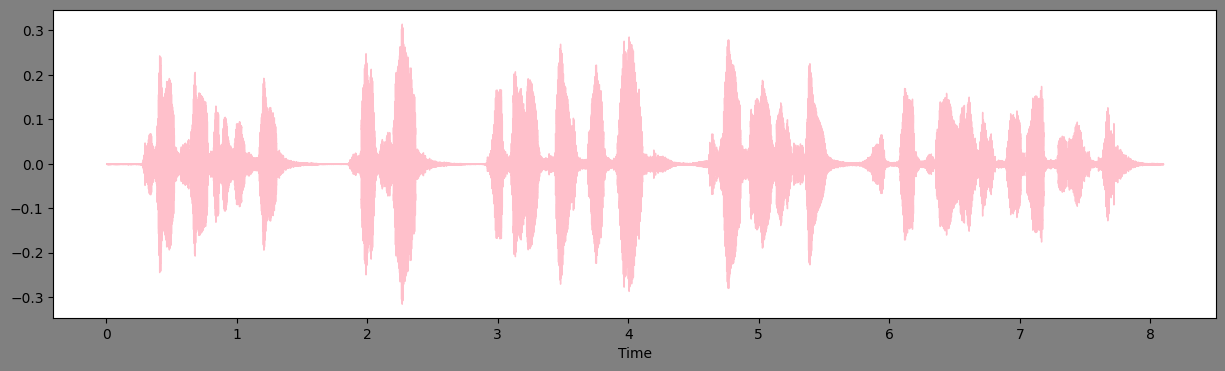

In [41]:
plt.figure(figsize=(15, 4), facecolor=(.5, .5, .5))
librosa.display.waveshow(music_array2, sr=sample_rate2, color='pink')

In [42]:
X = librosa.stft(music_array2)
Xdb = librosa.amplitude_to_db(abs(X))

In [43]:
Xdb

array([[-42.076374, -41.926365, -34.35733 , ..., -39.326645, -28.034487,
        -22.414381],
       [-42.076374, -34.62022 , -29.410385, ..., -39.44029 , -28.909393,
        -25.969505],
       [-33.857925, -29.769566, -33.218952, ..., -21.472404, -23.476402,
        -23.12048 ],
       ...,
       [-42.076374, -42.076374, -42.076374, ..., -42.076374, -42.076374,
        -42.076374],
       [-42.076374, -42.076374, -42.076374, ..., -42.076374, -42.076374,
        -42.076374],
       [-42.076374, -42.076374, -42.076374, ..., -42.076374, -42.076374,
        -42.076374]], dtype=float32)

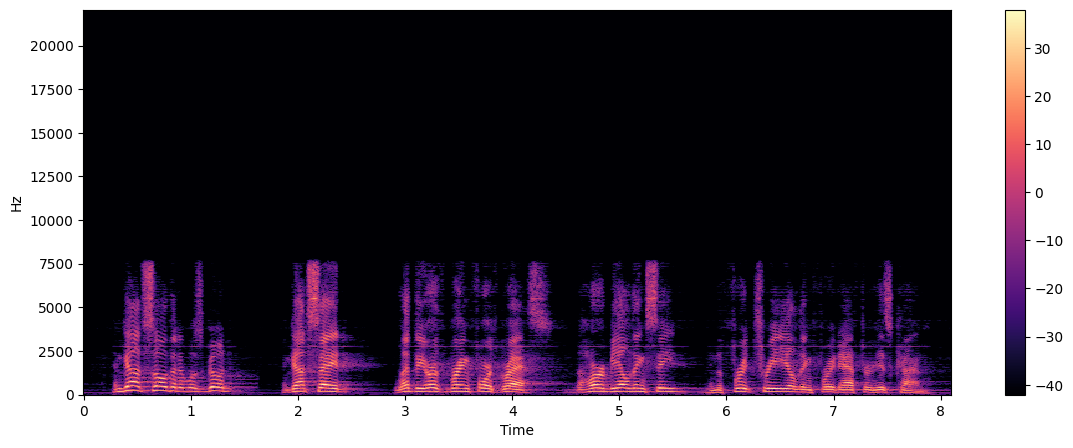

In [44]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate2, x_axis='time', y_axis='hz')
plt.colorbar()

In [45]:
print(music_array2.shape, sample_rate2)

(357125,) 44100


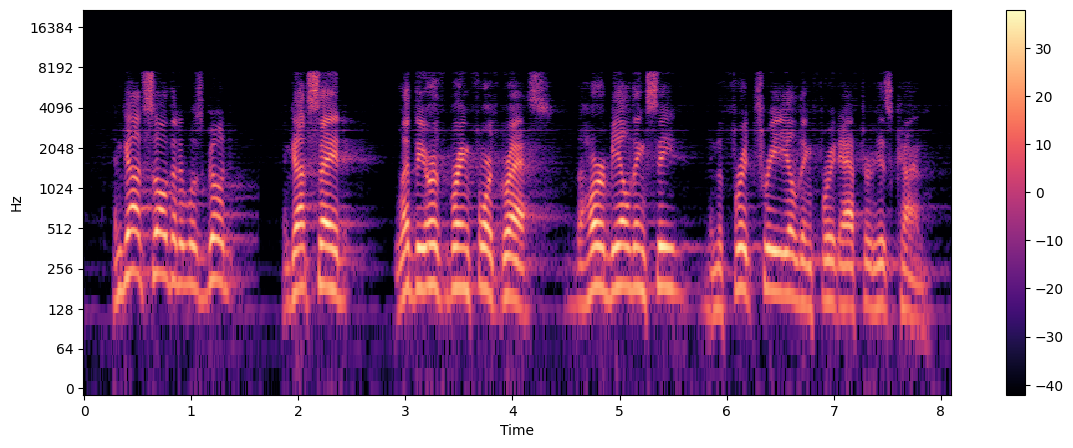

In [46]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate2, x_axis='time', y_axis='log')
plt.colorbar()

In [48]:
tempo, beat_frames = librosa.beat.beat_track(y=music_array2, sr=sample_rate2)
print(f'Estimated tempo: {tempo} beats per minute')

Estimated tempo: [52.734375] beats per minute


In [49]:
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sample_rate2)

In [50]:
beat_times.shape


(3,)

In [51]:
beat_times


array([0.41795918, 1.97369615, 2.99537415])

(-1.0, 1.0)

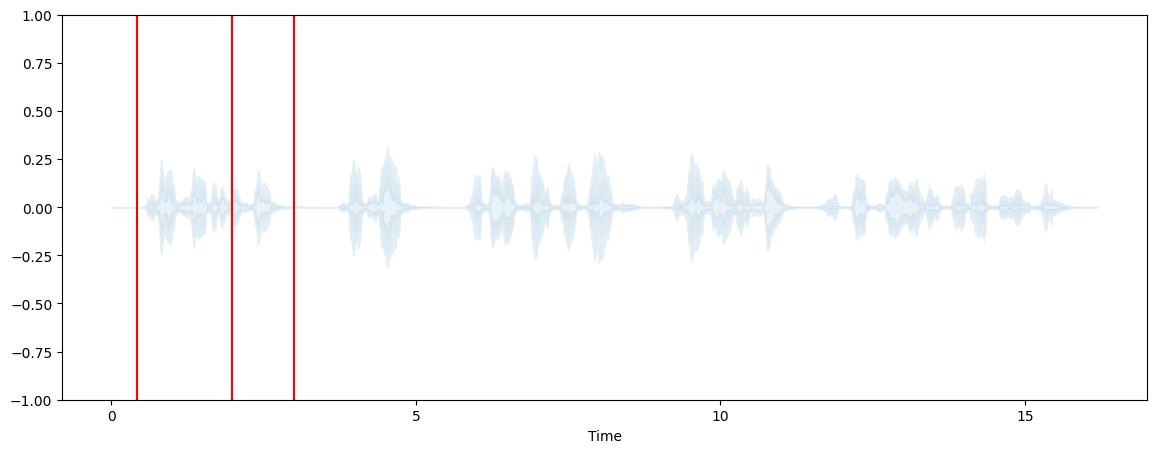

In [52]:
# Got help from here - https://musicinformationretrieval.com/beat_tracking.html
plt.figure(figsize=(14, 5))
librosa.display.waveshow(music_array2, alpha=0.1)
plt.vlines(beat_times, -1, 1, color='r')
plt.ylim(-1, 1)

In [53]:
import soundfile as sf


In [54]:
sf.write('temp_file_1.wav', music_array2, samplerate=sample_rate2)

In [59]:
sf.write('temp_file_48000.wav', music_array2, 68000, 'PCM_24')

In [60]:
temp_x, temp_sr = sf.read('temp_file_48000.wav')
print(temp_x.shape, temp_sr)
ipd.Audio(temp_x, rate=temp_sr) 

(357125,) 68000
